In [20]:
from __future__ import division
from matplotlib import pyplot as plt
from sklearn import datasets
from scipy.stats import mode
from scipy import linalg as la
import numpy as np
import pandas as pd
import numpy as np
%matplotlib inline

ImportError: No module named base

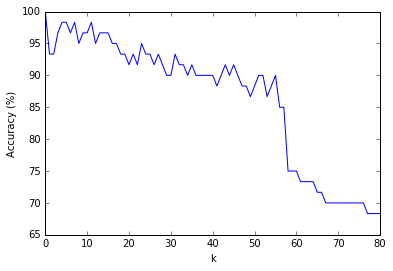

Average accuracy:  86.2962962963 %


In [15]:
class KNN(object):
    """
    A class which accepts initial training data and labels. Includes
    the following methods:
    
    -A method to classify new samples given a k value.
    -A method to compute the k-neighborhood of a sample x given k
        and a training set.
    -A function that labels a new sample x given k and a training set.
    """
    
    def __init__(self, data, labels, k):
        self.data = data
        self.labels = np.array(labels)
        self.k = k
        
    @staticmethod
    def metric(x,y):
        return la.norm(x-y,ord=2)
    
    def classify(self, point, add=False):
        d = {self.metric(x,point): i for i,x in enumerate(self.data)}
        indices = np.array([d[i] for i in sorted(d.keys())[:self.k]])
        return mode(self.labels[indices])[0][0]
    
    def accuracy(self, points, labels):
        return 100*np.mean(np.array([self.classify(point) for point in points]) == np.array(labels))
    

# Iris dataset demonstration
iris = datasets.load_iris()
n = len(iris['target'])
index = np.arange(n)

test_index = sorted(np.random.choice(index, int(n*.4),replace=False))
train_index = np.array([i for i in index if i not in test_index])

train_data = iris['data'][train_index]
test_data = iris['data'][test_index]

train_labels = iris['target'][train_index]
test_labels = iris['target'][test_index]

ks = np.arange(81)
accuracies = np.zeros(81)
accuracies[0] = 100
for k in xrange(1,81):
    knn = KNN(train_data, train_labels, k)
    accuracies[k] = knn.accuracy(test_data, test_labels)
    
plt.plot(ks, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.show()

print 'Average accuracy: ', np.mean(accuracies), '%'

In [21]:
class SVM(object):
    """
    SVM class which accepts a training data set and target set.
    
    Methods:
    setKernel: accepts one of the three kernel types and defines a kernel
        function for the object.
    fit: a method which trains the classifier.
    predict: a method which predicts the class of a new sample.
    """
    def setKernel(self,kind,a=0,d=2,gamma=.5,r=0):
        if kind == "poly":
            self.kernel = lambda x,y: (np.dot(x,y)+a)**d
        elif kind == "RBF":
            self.kernel = lambda x,y: np.exp(-1*gamma*la.norm(x-y)**2)
        elif kind == "sigmoid":
            self.kernel = lambda x,y: np.tanh(np.dot(x,y)+r)

    def fit(self,data,labels):
        n = data.shape[0]
        K = np.array([[self.kernel(data[i], data[j]) for j in xrange(n)] for i in xrange(n)])
        P = matrix(np.outer(labels, labels)*K)
        q = matrix(np.ones(n)*-1)
        A = matrix(labels, (1, n))
        b = matrix(0)
        G = matrix(np.diag(np.ones(n)*-1))
        h = matrix(np.zeros(n))
        
        sol = solvers.qp(P,q,G,h,A,b)
        self.a = np.ravel(sol['x'])
        self.data = np.array(data)
        self.labels = np.array(labels)
        
    def predict(self,sample):
        f = np.dot(self.labels*self.a, np.array([self.kernel(sample, x) for x in self.data]))
        return 1 if f > 0 else -1
        
    def accuracy(self,data,labels):
        return 100*np.mean(np.array([self.predict(x) for x in data]) == np.array(labels))
    
print "Was unable to get cvxopt to work on my laptop. Works on the lab computers though."

Was unable to get cvxopt to work on my laptop. Works on the lab computers though.


In [22]:
cancer = pd.read_csv("cancer.csv",index_col=0)
cancer = cancer.loc[cancer["bare-nuclei"] != "?"]

# For partitioning the data 60/40 training/testing
def partition():
    
    test = np.random.choice(cancer.index, int(.4*len(cancer.index)), replace=False)
    train = [i for i in cancer.index if i not in test]

    train_data = np.array(cancer.loc[train].drop("cancerous", axis=1), dtype=np.float)
    train_labels = np.array(cancer.loc[train]["cancerous"], dtype=np.float)

    test_data = np.array(cancer.loc[test].drop("cancerous", axis=1), dtype=np.float)
    test_labels = np.array(cancer.loc[test]["cancerous"], dtype=np.float)
    
    return train_data, train_labels, test_data, test_labels


# Train SVM
svm = SVM()
train_data, train_labels, test_data, test_labels = partition()
for x in ["poly", "RBF", "sigmoid"]:
    svm.setKernel(x)
    svm.fit(train_data, train_labels)
    PA = svm.accuracy(test_data, test_labels)
    print "Kernel Method: {}\tAccuracy: {}%".format(x, PA)

NameError: global name 'matrix' is not defined